In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from irl_chess import make_maia_test_csv, load_maia_test_data, get_states, load_config
from irl_chess.misc_utils.load_save_utils import is_valid_game, get_boards_between
from tqdm import tqdm
import chess
from os.path import join
while not os.getcwd().endswith('irl-chess'):
    os.chdir('..')
    print(f'Current working changed to {os.getcwd()}')

Data extracted from 'https://database.lichess.org/' with the help of chatGPT

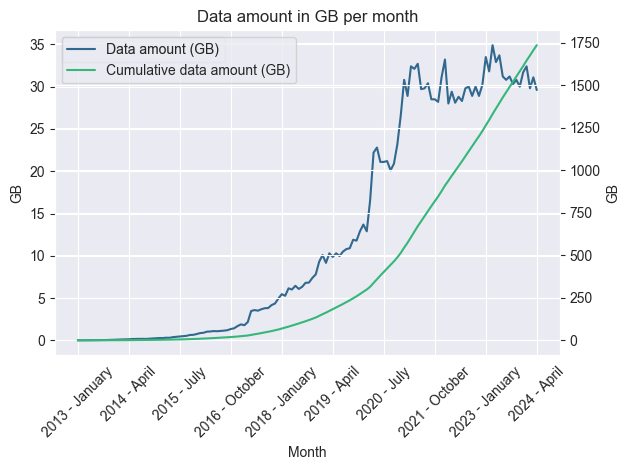

In [83]:
data = [
    ("2024 - April", 29.6),
    ("2024 - March", 31.1),
    ("2024 - February", 29.8),
    ("2024 - January", 32.4),
    ("2023 - December", 31.7),
    ("2023 - November", 30.0),
    ("2023 - October", 30.8),
    ("2023 - September", 30.3),
    ("2023 - August", 31.2),
    ("2023 - July", 30.8),
    ("2023 - June", 31.2),
    ("2023 - May", 33.7),
    ("2023 - April", 32.9),
    ("2023 - March", 34.9),
    ("2023 - February", 31.8),
    ("2023 - January", 33.5),
    ("2022 - December", 30.2),
    ("2022 - November", 28.9),
    ("2022 - October", 30.0),
    ("2022 - September", 28.9),
    ("2022 - August", 30.0),
    ("2022 - July", 29.8),
    ("2022 - June", 28.3),
    ("2022 - May", 28.8),
    ("2022 - April", 28.1),
    ("2022 - March", 29.4),
    ("2022 - February", 28.0),
    ("2022 - January", 33.2),
    ("2021 - December", 31.1),
    ("2021 - November", 28.2),
    ("2021 - October", 28.5),
    ("2021 - September", 28.5),
    ("2021 - August", 30.4),
    ("2021 - July", 29.8),
    ("2021 - June", 29.7),
    ("2021 - May", 32.7),
    ("2021 - April", 32.1),
    ("2021 - March", 32.4),
    ("2021 - February", 28.9),
    ("2021 - January", 30.8),
    ("2020 - December", 26.6),
    ("2020 - November", 23.2),
    ("2020 - October", 20.9),
    ("2020 - September", 20.1),
    ("2020 - August", 21.2),
    ("2020 - July", 21.1),
    ("2020 - June", 21.1),
    ("2020 - May", 22.8),
    ("2020 - April", 22.2),
    ("2020 - March", 16.6),
    ("2020 - February", 12.9),
    ("2020 - January", 13.7),
    ("2019 - December", 12.9),
    ("2019 - November", 11.8),
    ("2019 - October", 11.9),
    ("2019 - September", 10.9),
    ("2019 - August", 10.8),
    ("2019 - July", 10.5),
    ("2019 - June", 9.98),
    ("2019 - May", 10.3),
    ("2019 - April", 9.87),
    ("2019 - March", 10.3),
    ("2019 - February", 9.17),
    ("2019 - January", 10.1),
    ("2018 - December", 9.3),
    ("2018 - November", 7.81),
    ("2018 - October", 7.39),
    ("2018 - September", 6.84),
    ("2018 - August", 6.81),
    ("2018 - July", 6.34),
    ("2018 - June", 6.09),
    ("2018 - May", 6.46),
    ("2018 - April", 6.02),
    ("2018 - March", 6.16),
    ("2018 - February", 5.28),
    ("2018 - January", 5.47),
    ("2017 - December", 4.95),
    ("2017 - November", 4.36),
    ("2017 - October", 4.18),
    ("2017 - September", 3.83),
    ("2017 - August", 3.81),
    ("2017 - July", 3.69),
    ("2017 - June", 3.52),
    ("2017 - May", 3.59),
    ("2017 - April", 3.48),
    ("2017 - March", 2.17),
    ("2017 - February", 1.8),
    ("2017 - January", 1.9),
    ("2016 - December", 1.7),
    ("2016 - November", 1.44),
    ("2016 - October", 1.35),
    ("2016 - September", 1.21),
    ("2016 - August", 1.16),
    ("2016 - July", 1.12),
    ("2016 - June", 1.09),
    ("2016 - May", 1.11),
    ("2016 - April", 1.06),
    ("2016 - March", 1.04),
    ("2016 - February", 0.908),
    ("2016 - January", 0.872),
    ("2015 - December", 0.758),
    ("2015 - November", 0.667),
    ("2015 - October", 0.647),
    ("2015 - September", 0.547),
    ("2015 - August", 0.504),
    ("2015 - July", 0.483),
    ("2015 - June", 0.432),
    ("2015 - May", 0.392),
    ("2015 - April", 0.317),
    ("2015 - March", 0.324),
    ("2015 - February", 0.283),
    ("2015 - January", 0.286),
    ("2014 - December", 0.259),
    ("2014 - November", 0.228),
    ("2014 - October", 0.205),
    ("2014 - September", 0.179),
    ("2014 - August", 0.193),
    ("2014 - July", 0.2),
    ("2014 - June", 0.182),
    ("2014 - May", 0.172),
    ("2014 - April", 0.137),
    ("2014 - March", 0.129),
    ("2014 - February", 0.113),
    ("2014 - January", 0.111),
    ("2013 - December", 0.0918),
    ("2013 - November", 0.077),
    ("2013 - October", 0.0627),
    ("2013 - September", 0.0472),
    ("2013 - August", 0.0477),
    ("2013 - July", 0.043),
    ("2013 - June", 0.0329),
    ("2013 - May", 0.0265),
    ("2013 - April", 0.0233),
    ("2013 - March", 0.0236),
    ("2013 - February", 0.0182),
    ("2013 - January", 0.0178)
]
data.reverse()
timestamps = [entry[0] for entry in data]
sizes = [entry[1] for entry in data]
plot_path = join('results', 'plots', 'data_section')
os.makedirs(plot_path, exist_ok=True)
plot_path_data = join(plot_path, 'data_amount_over_time.svg')

palette_data = sns.color_palette("viridis", 2)
fig, ax = plt.subplots(1, )
ln1 = ax.plot(range(len(sizes)), sizes, label='Data amount (GB)', color=palette_data[0])
ax.set_title("Data amount in GB per month")
ax.set_xlabel('Month')
ax.set_ylabel('GB')
ax.set_xticks(range(len(sizes)), timestamps, rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax2 = ax.twinx()
ln2 = ax2.plot(np.cumsum(sizes), label=f'Cumulative data amount (GB)', color=palette_data[1])
ax2.set_ylabel('GB')
lg1 = ax.legend()
ax2.legend(ln1+ln2, [l.get_label() for l in ln1+ln2])

plt.tight_layout()
plt.savefig(plot_path_data)
plt.show()
plt.close()

In [60]:
df_val = make_maia_test_csv(return_full_df=True)

ELO Players data loading: 100%|██████████| 9/9 [00:00<00:00, 4499.25it/s]


data/processed/maia_test/1100_1200_10000.csv exists and was not created
data/processed/maia_test/1200_1300_10000.csv exists and was not created
data/processed/maia_test/1300_1400_10000.csv exists and was not created
data/processed/maia_test/1400_1500_10000.csv exists and was not created
data/processed/maia_test/1500_1600_10000.csv exists and was not created
data/processed/maia_test/1600_1700_10000.csv exists and was not created
data/processed/maia_test/1700_1800_10000.csv exists and was not created
data/processed/maia_test/1800_1900_10000.csv exists and was not created
data/processed/maia_test/1900_2000_10000.csv exists and was not created


In [3]:
n_boards = 10000
df_1100 = load_maia_test_data(1100, n_boards=n_boards)
df_1900 = load_maia_test_data(1900, n_boards=n_boards)

In [5]:
pgn_paths = ['data/raw/lichess_db_standard_rated_2019-01.pgn']
config_1100 = {'n_boards': n_boards, 'min_elo': 1100, 'max_elo': 1200, 'n_midgame': 10, 'n_endgame': 100}
config_1900 = {'n_boards': n_boards, 'min_elo': 1900, 'max_elo': 2000, 'n_midgame': 10, 'n_endgame': 100}
games_1100 = get_states(websites_filepath=None, file_path_data=None, config_data=config_1100, out_path='', use_ply_range=False, pgn_paths=pgn_paths, return_games=True, verbose=False)
games_1900 = get_states(websites_filepath=None, file_path_data=None, config_data=config_1900, out_path='', use_ply_range=False, pgn_paths=pgn_paths, return_games=True, verbose=False)

data/raw/lichess_db_standard_rated_2019-01.pgn


Looking through file 0:   0%|          | 25434102/71794048413 [00:20<16:24:39, 1214780.43it/s]


data/raw/lichess_db_standard_rated_2019-01.pgn


Looking through file 0:   0%|          | 70588755/71794048413 [00:55<15:46:54, 1262409.94it/s]


In [105]:
from collections import defaultdict
bins_len = np.array((10, 30, 50, 70, 101))
def create_multi_list_from_df(df, bins_len):
    bins_labels = [f'{bin_}-{bins_len[i+1]-1}' for i, bin_ in enumerate(bins_len[:-1])] + [f'{bins_len[-1]}+']

    elo_multi = [[] for _ in bins_len[:-1]]
    
    for i, len_ in enumerate(bins_len[:-1]):
        mask = (len_ <= df['move_ply']) & (df['move_ply'] < (bins_len[i+1]))
        elo_multi[i] = np.concatenate((df['opponent_elo'][mask].values, df['white_elo'][mask].values)).flatten()
    
    return elo_multi, bins_labels

elo_1100_test_multi, bins_labels = create_multi_list_from_df(df_1100, bins_len)
elo_1900_test_multi, bins_labels = create_multi_list_from_df(df_1900, bins_len)
elo_big_full_multi, bins_labels = create_multi_list_from_df(df_val, bins_len)

In [134]:
def create_multi_list_from_games(games, bins_len):
    bins_labels = [f'{bin_}-{bins_len[i+1]-1}' for i, bin_ in enumerate(bins_len[:-1])]
    elo_train = []
    for game in games:
        for i, move in enumerate(game.mainline_moves()):
            if 10 < i:
                elo_train.append([int(game.headers['WhiteElo']), int(game.headers['BlackElo']), i])

    elo_dict = defaultdict(lambda: [])
    
    for elo1, elo2, len_ in elo_train:
        elo_dict[sum(len_ > bins_len[:-1])-1] += [elo1, elo2]
    elo_multi = [[] for _ in elo_dict.keys()]
    print(elo_dict.keys())
    for idx, list_ in elo_dict.items():
        elo_multi[idx] = list_
    
    return elo_multi, bins_labels

elo_1100_train_multi, bins_labels = create_multi_list_from_games(games_1100, bins_len)
elo_1900_train_multi, bins_labels = create_multi_list_from_games(games_1900, bins_len)

dict_keys([0, 1, 2, 3])
dict_keys([0, 1, 2, 3])


In [135]:
def elo_distribution_plot(elos, filename, title_name, bins=10, bins_labels=None):
    if type(elos) is list:
        assert bins is not None, 'Must provide bins_len for stacked plot'
        plt.hist(elos, bins=bins, label=bins_labels, stacked=True, alpha=0.9)
        min_max = [(np.min(elo), np.max(elo)) for elo in elos]
        min_elo, max_elo,  =  round(np.min(min_max)/100) * 100, round(np.max(min_max)/100) * 100
    else:
        min_elo, max_elo,  =  np.min(elos)-1, np.max(elos),
        plt.hist(elos, bins=bins, label=f'ELO Distribution')
    plt.title(f'Distribution of ELOs between {min_elo} and {max_elo} for {title_name}')
    plt.xlabel('ELO')
    plt.ylabel('Position count')
    
    plt.legend(title='Move Ply')
    plt.savefig(filename)
    plt.show()

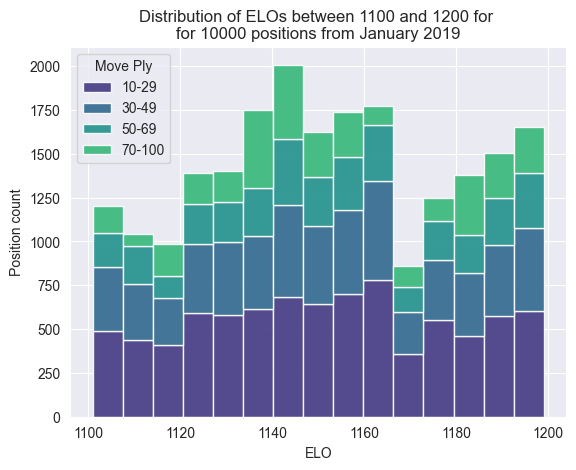

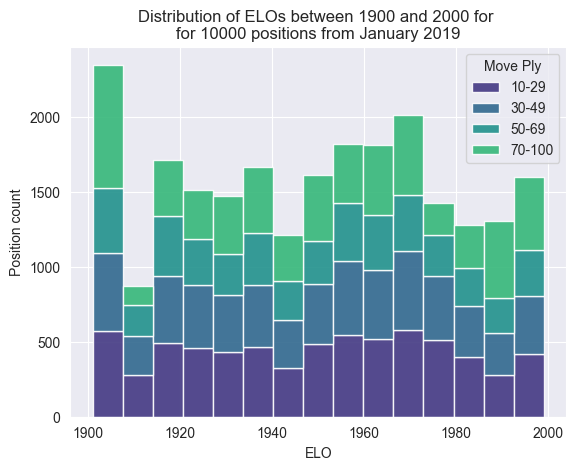

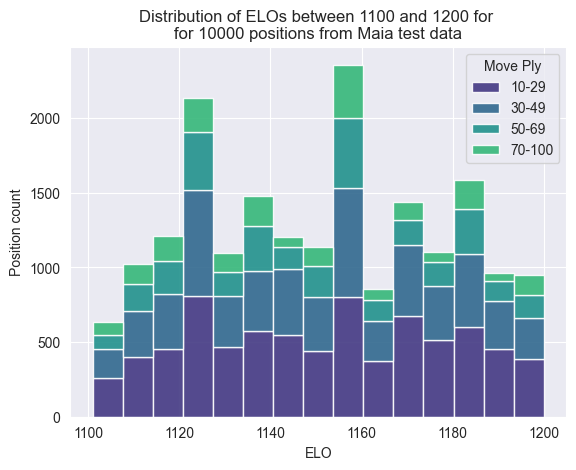

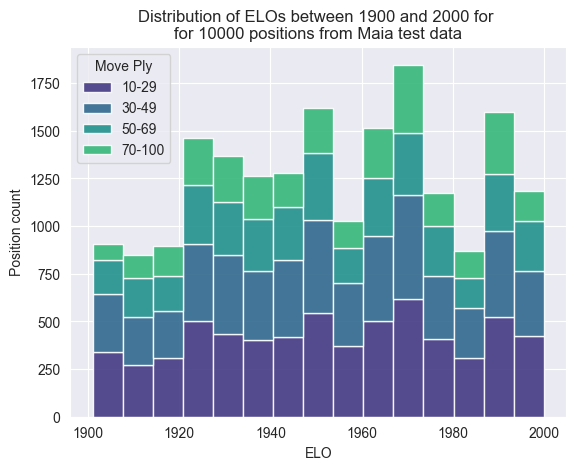

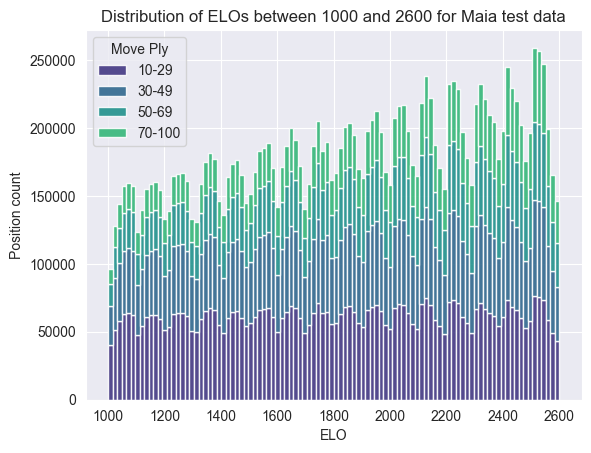

In [136]:
elo_plot_paths = join(plot_path, 'elo_distribution')
os.makedirs(elo_plot_paths, exist_ok=True)
bins_smaller = 15
base_filename_elo_plot = 'elo_length_distribution'
elo_distribution_plot(elo_1100_train_multi, 
                      filename=join(elo_plot_paths, f'{base_filename_elo_plot}_1100_jan_2019.svg'), 
                      title_name=f'\nfor {n_boards} positions from January 2019', bins=bins_smaller, 
                      bins_labels=bins_labels)
elo_distribution_plot(elo_1900_train_multi, 
                      filename=join(elo_plot_paths, f'{base_filename_elo_plot}_1900_jan_2019.svg'), 
                      title_name=f'\nfor {n_boards} positions from January 2019', 
                      bins=bins_smaller, bins_labels=bins_labels)

elo_distribution_plot(elo_1100_test_multi, 
                      filename=join(elo_plot_paths, f'{base_filename_elo_plot}_1100_maia_test.svg'), 
                      title_name=f'\nfor {n_boards} positions from Maia test data', 
                      bins=bins_smaller, bins_labels=bins_labels)

elo_distribution_plot(elo_1900_test_multi, 
                      filename=join(elo_plot_paths, f'{base_filename_elo_plot}_1900_maia_test.svg'), 
                      title_name=f'\nfor {n_boards} positions from Maia test data', 
                      bins=bins_smaller, 
                      bins_labels=bins_labels)

elo_distribution_plot(elo_big_full_multi, 
                      filename=join(elo_plot_paths, f'{base_filename_elo_plot}_full_maia_test.svg'), 
                      title_name='Maia test data', 
                      bins=100, 
                      bins_labels=bins_labels)